In [1]:
# import necessary libraries :
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# reading dataset :
pd.set_option('display.max_columns', 30)
df = pd.read_csv("house_prices_dataset.csv")
df.head()

,Area(SQM),Bedroom,Bathroom,Location,Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Type,Level,Furnished,Compound,Delivery_Date,Delivery_Term
0,125,3,2,Shatby,2200000,1,1,1,1,1,0,1,0,0,0,0,0,0,0,Apartment,10,0.0,NaN,Ready,Finished
1,120,4,1,Sidi Beshr,500000,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Apartment,3,0.0,NaN,Ready,Finished
2,165,3,2,Sidi Beshr,1500000,1,1,1,1,1,0,1,0,0,0,0,0,0,0,Apartment,3,0.0,NaN,NaN,Finished
3,155,3,2,Cleopatra,1650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Apartment,3,0.0,NaN,Ready,Finished
4,210,3,2,Smoha,2950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Apartment,6,0.0,NaN,NaN,Finished


In [3]:
# data information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area(SQM)              8741 non-null   int64  
 1   Bedroom                8741 non-null   object 
 2   Bathroom               8741 non-null   object 
 3   Location               8741 non-null   object 
 4   Price                  8741 non-null   int64  
 5   Negotiable             8741 non-null   int64  
 6   Balcony                8741 non-null   int64  
 7   Electricity            8741 non-null   int64  
 8   Water                  8741 non-null   int64  
 9   Gas                    8741 non-null   int64  
 10  Landline               8741 non-null   int64  
 11  Elevator               8741 non-null   int64  
 12  Security               8741 non-null   int64  
 13  Built_in_Kitchen       8741 non-null   int64  
 14  Maids_Room             8741 non-null   int64  
 15  Priv

In [4]:
df.describe()

,Area(SQM),Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Furnished
count,8741.000000,8.741000e+03,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,7216.000000
mean,140.820615,1.470502e+06,0.438051,0.607024,0.757922,0.742936,0.567784,0.398238,0.616749,0.486443,0.139687,0.099073,0.078366,0.155245,0.061663,0.087862,0.118902
std,61.690883,2.083523e+06,0.496176,0.488439,0.428366,0.437040,0.495412,0.489563,0.486207,0.499845,0.346681,0.298778,0.268763,0.362159,0.240557,0.283110,0.323696
min,10.000000,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,3.750000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.000000,8.000000e+05,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,2.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,900.000000,8.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning :

### Area :

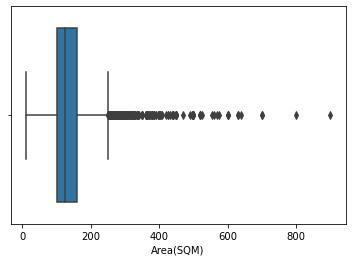

In [5]:
# Use Boxplot to visualize the distribution values :
sb.boxplot(data = df, x = 'Area(SQM)');

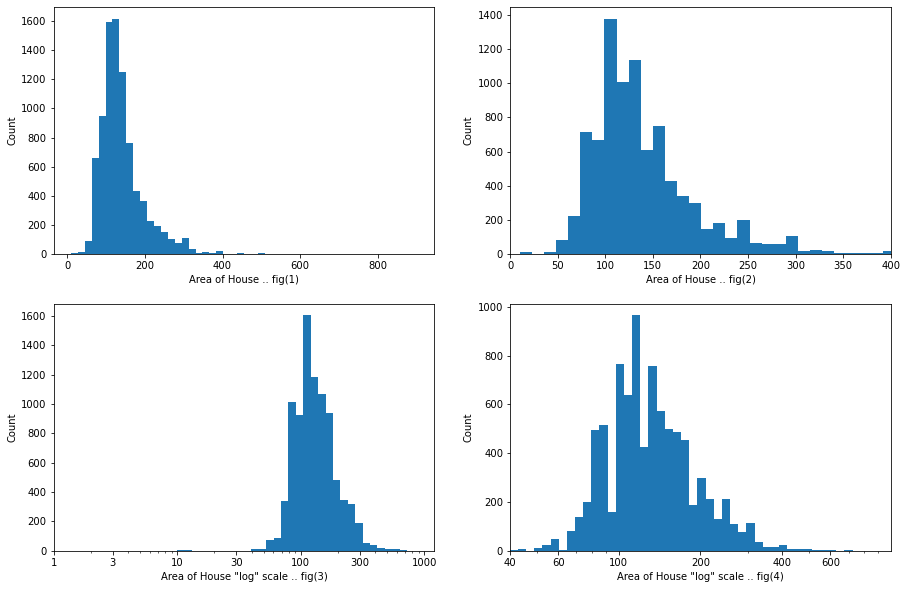

In [6]:
plt.figure(figsize = [15,10]);
plt.subplot(2,2,1);
plt.hist(data = df, x = 'Area(SQM)', bins = 50);
plt.xlabel("Area of House .. fig(1)");
plt.ylabel('Count');

# Limiting Data to visalize Area between (0,400) :
plt.subplot(2,2,2);
plt.hist(data = df, x = 'Area(SQM)', bins = 70);
plt.xlim([0,400]);
plt.xlabel('Area of House .. fig(2)');
plt.ylabel('Count');

plt.subplot(2,2,3);
bins_range = 10**np.arange(1, 3, 0.06)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = df, x = 'Area(SQM)', bins = bins_range);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Area of House "log" scale .. fig(3)');
plt.ylabel('Count');

plt.subplot(2,2,4);
bins_range = 10**np.arange(1, 3, 0.03)
ticks = [40,60,100,200,400,600]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = df, x = 'Area(SQM)', bins = bins_range);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlim([40,1000]);
plt.xlabel('Area of House "log" scale .. fig(4)');
plt.ylabel('Count');

In [7]:
# determine the bins range passed on logarithmic values of (Area) :
np.log10(df['Area(SQM)'].describe())

count    3.941561
mean     2.148666
std      1.790221
min      1.000000
25%      2.000000
50%      2.096910
75%      2.204120
max      2.954243
Name: Area(SQM), dtype: float64

* From figure 1 we can note that the number of records with area > 400 is very low, so we will tend to limit our visualization of area from 0 to 400 as we see in fig(2).

* In figure 3 we used 'log' scale for x-axis to better visualizing data and we noted that there are some records with area < 40 sqm , those values tend to be outliers, we removed those records from visualization as we see in fig(4)

In [8]:
# detect records less than 40 sqm :
df[df['Area(SQM)'] < 40] 

,Area(SQM),Bedroom,Bathroom,Location,Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Type,Level,Furnished,Compound,Delivery_Date,Delivery_Term
492,32,2,1,Attarin,250000,0,0,1,1,1,0,0,0,0,0,0,0,0,0,Studio,1,NaN,NaN,soon,Finished
1716,14,2,1,Nakheel,265000,0,1,1,1,0,0,0,1,1,0,0,0,0,1,Studio,NaN,0.0,NaN,Ready,Finished
1758,17,3,2,Raml Station,3000000,0,1,1,1,1,0,1,1,0,0,0,0,0,0,Apartment,10+,0.0,NaN,NaN,Finished
2828,10,3,2,Laurent,1700000,0,0,1,1,1,1,1,1,0,0,0,0,0,0,Apartment,10+,0.0,NaN,Ready,NaN
3292,35,1,1,Cleopatra,950000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,Studio,1,0.0,NaN,2022,Not Finished
3308,13,2,1,Roushdy,2800000,1,1,1,1,1,1,1,1,1,0,0,0,0,0,Apartment,7,1.0,NaN,soon,Finished
3317,20,1,1,Stanley,560000,0,1,1,1,1,1,1,1,0,0,0,1,1,0,Apartment,7,NaN,NaN,2025,NaN
3324,10,3,1,Agami,320000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Apartment,2,NaN,NaN,Ready,Finished
3474,10,10+,6,Agami,800000,1,0,1,1,0,0,0,0,0,0,1,0,0,0,Apartment,3,0.0,NaN,NaN,Semi Finished
4872,33,2,1,El Max,300000,1,0,1,1,1,0,0,1,0,0,0,0,0,0,Duplex,3,0.0,Amorada,Ready,Finished


In [9]:
# remove outliers :
df = df[df['Area(SQM)'] >= 40] 

* From fig(3) and fig (4) we can see that Area is Normally destributed in log scale.

* Now we want to detect outliers which can't observed from visualization using IQR :

In [10]:
df['Area(SQM)'].describe()

count    8727.000000
mean      141.019251
std        61.539448
min        40.000000
25%       100.000000
50%       125.000000
75%       160.000000
max       900.000000
Name: Area(SQM), dtype: float64

* 50% of the apartments for sale are between 100 to 160 square meters Area.

In [11]:
# Calculate IQR :
IQR = df['Area(SQM)'].quantile(0.75) - df['Area(SQM)'].quantile(0.25)
df['Area(SQM)'].quantile(0.75) + (IQR * 1.5)

250.0

In [12]:
df[df['Area(SQM)'] >250] 

,Area(SQM),Bedroom,Bathroom,Location,Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Type,Level,Furnished,Compound,Delivery_Date,Delivery_Term
12,260,3,3,Smoha,1500000,1,1,0,0,0,0,1,1,0,0,0,1,0,0,Apartment,6,0.0,NaN,2023,Finished
46,310,3,3,Kafr Abdo,6500000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Apartment,7,NaN,NaN,NaN,Finished
50,288,4,3,Smoha,4100000,0,1,1,1,1,0,1,1,0,0,0,0,0,0,Apartment,2,0.0,NaN,NaN,NaN
98,292,4,3,Saba Pasha,13000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Apartment,10+,1.0,NaN,Ready,Finished
114,306,4,2,Smoha,3100000,1,1,1,1,1,1,1,1,0,0,0,0,0,0,Duplex,8,1.0,NaN,Ready,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,280,3,2,Agami,450000,0,0,1,1,1,0,1,1,0,0,0,0,0,0,Duplex,8,NaN,NaN,NaN,Not Finished
8722,327,4,3,Azarita,8047470,0,0,1,1,1,1,1,1,0,0,0,0,1,0,Apartment,3,NaN,NaN,Ready,Semi Finished
8730,302,3,3,Azarita,6039000,0,0,1,1,0,0,1,1,0,0,0,0,1,0,Apartment,4,NaN,NaN,Ready,Semi Finished
8734,300,3,4,Kafr Abdo,4500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Apartment,8,0.0,NaN,NaN,Finished


In [13]:
# removing outlieers :
df = df[df['Area(SQM)'] <= 250] 

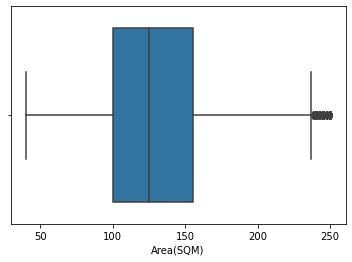

In [14]:
sb.boxplot(data = df, x = 'Area(SQM)');

### Bedrooms :

In [15]:
df['Bedroom'].value_counts()

3      4404
2      3322
4       333
1       158
5        47
6         8
8         2
10+       2
7         1
Name: Bedroom, dtype: int64

In [16]:
# remove records with Bedroom > 6 :
df['Bedroom'] = df['Bedroom'].replace('10+' , '10').astype(int)
df = df[df['Bedroom'] < 7]

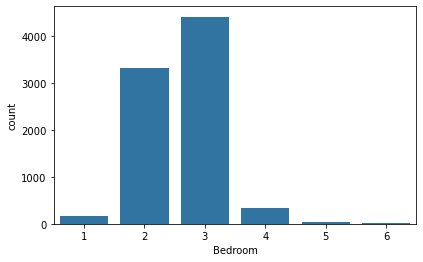

In [17]:
# Bedroom:
plt.figure(figsize = [6.5,4]);
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Bedroom', color = color);

### Bathrooms :

In [18]:
df['Bathroom'].value_counts()

1      5061
2      2575
3       607
4        25
5         2
10+       1
6         1
Name: Bathroom, dtype: int64

In [19]:
# remove records with Bathroom > 5 :
df['Bathroom'] = df['Bathroom'].replace('10+' , '10').astype(int)
df = df[df['Bathroom'] < 5]

In [20]:
df['Bathroom'].value_counts()

1    5061
2    2575
3     607
4      25
Name: Bathroom, dtype: int64

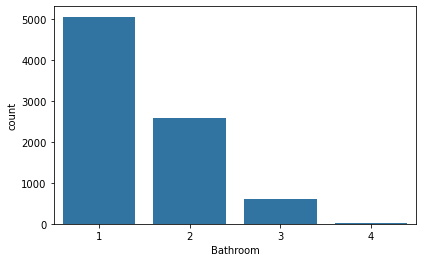

In [21]:
plt.figure(figsize = [6.5,4]);
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Bathroom', color = color);

### location :

In [22]:
df['Location'].value_counts()

Nakheel             1147
Agami               1035
Smoha               1009
Sidi Beshr           690
Miami                507
Moharam Bik          356
Mandara              340
Seyouf               303
Laurent              216
Asafra               209
Maamoura             177
Al Ibrahimiyyah      138
Roushdy              131
Glim                 122
Kafr Abdo            122
Saba Pasha           111
Victoria             102
Sporting              96
Montazah              95
Sidi Gaber            92
Abu Qir               85
Fleming               79
Al Hadrah             74
Bolkly                69
San Stefano           67
Zezenia               65
Camp Caesar           64
Stanley               62
Bacchus               62
Gianaclis             61
Awayed                57
Borg al-Arab          56
Cleopatra             49
Azarita               44
Bahray - Anfoshy      41
Abu Talat             39
Karmous               29
Schutz                27
Amreya                27
Wardian               25


In [23]:
# arrangement :
loc_order = df['Location'].value_counts().index
loc_order

Index(['Nakheel', 'Agami', 'Smoha', 'Sidi Beshr', 'Miami', 'Moharam Bik',
       'Mandara', 'Seyouf', 'Laurent', 'Asafra', 'Maamoura', 'Al Ibrahimiyyah',
       'Roushdy', 'Glim', 'Kafr Abdo', 'Saba Pasha', 'Victoria', 'Sporting',
       'Montazah', 'Sidi Gaber', 'Abu Qir', 'Fleming', 'Al Hadrah', 'Bolkly',
       'San Stefano', 'Zezenia', 'Camp Caesar', 'Stanley', 'Bacchus',
       'Gianaclis', 'Awayed', 'Borg al-Arab', 'Cleopatra', 'Azarita',
       'Bahray - Anfoshy', 'Abu Talat', 'Karmous', 'Schutz', 'Amreya',
       'Wardian', 'Dekheila', 'Manshiyya', 'Labban', 'Raml Station', 'Gomrok',
       'Kabbary', 'Attarin', 'Ras El Tin', 'Dhahria', 'Shatby', 'El Max',
       'Salehia', 'Koum al-Dikka'],
      dtype='object')

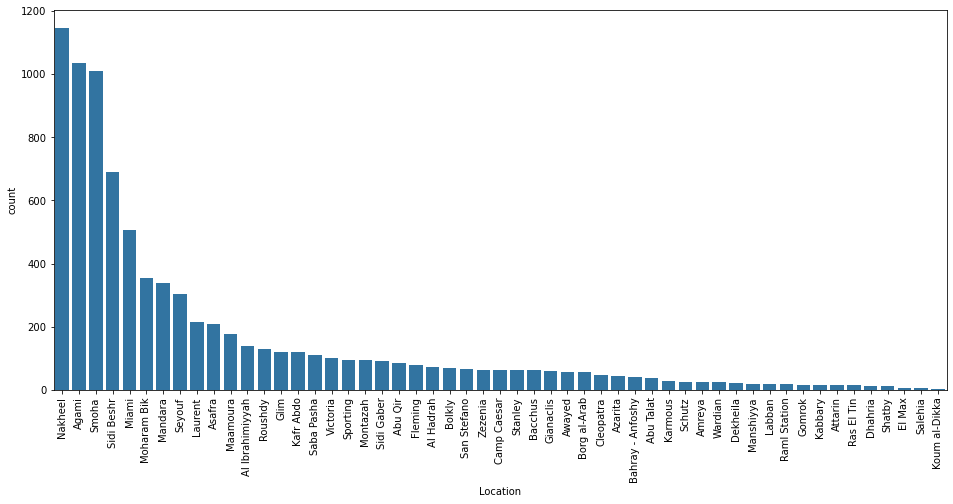

In [24]:
plt.figure(figsize = [16,7]);
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Location', order = loc_order, color = color);
plt.xticks(rotation = 90);

* The largest number of apartments for sale are located in Nakheel, Smoha and Agami :
* need to map those locations

### Price :

In [25]:
df['Price'].describe()

count    8.268000e+03
mean     1.302240e+06
std      1.711030e+06
min      2.000000e+05
25%      3.650000e+05
50%      7.500000e+05
75%      1.800000e+06
max      8.000000e+07
Name: Price, dtype: float64

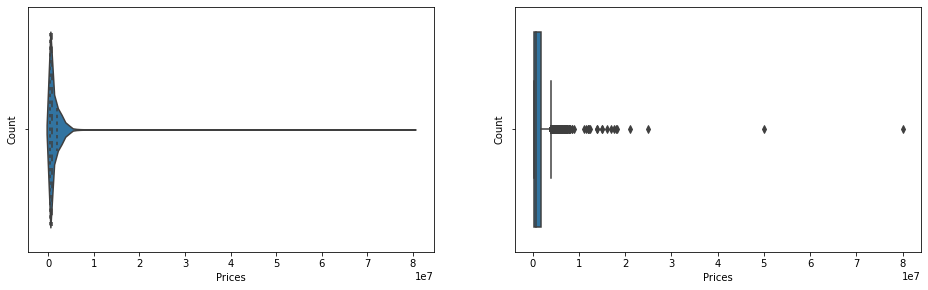

In [26]:
plt.figure(figsize = [16,4.5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'Price', inner = 'quartile');
plt.xlabel('Prices');
plt.ylabel('Count');
plt.subplot(1,2,2);

sb.boxplot(data = df, x = 'Price');
plt.xlabel('Prices');
plt.ylabel('Count');

In [27]:
# upper limit:
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
upper_limit = (IQR * 1.5) + df['Price'].quantile(0.75)
upper_limit

3952500.0

In [28]:
# removing outliers from dataset:
df = df[df['Price'] <= upper_limit]

In [29]:
# get limits of log scale of Price :
np.log10(df['Price'].describe())   # From 5.3 To 6.6

count    3.896416
mean     6.037771
std      5.968022
min      5.301030
25%      5.544068
50%      5.845098
75%      6.204120
max      6.596597
Name: Price, dtype: float64

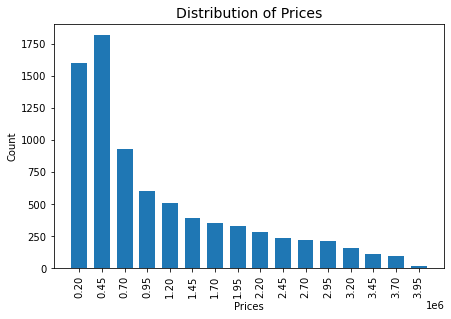

In [30]:
# Distribution of Prices :
plt.figure(figsize = [7,4.5]);

bin_edges = np.arange(75000, df['Price'].max()+250000, 250000)
plt.hist(data = df, x = 'Price', bins = bin_edges, rwidth = 0.7 );
plt.xticks(np.arange(df['Price'].min(), df['Price'].max()+250000, 250000), rotation = 90)
plt.xlabel('Prices');
plt.ylabel('Count');
plt.title("Distribution of Prices", size = 14);

* Number of apartments with specific price range decreases as price increases

 'Negotiable',
       'Balcony', 'Electricity', 'Water', 'Gas', 'Landline', 'Elevator',
       'Security', 'Built_in_Kitchen', 'Maids_Room', 'Private_Garden',
       'Parking', 'Central(A/C)& heating', 'Pool', 

In [31]:
variables = ['Negotiable','Balcony', 'Electricity', 'Water', 'Gas', 'Landline', 'Elevator','Security', 
             'Built_in_Kitchen', 'Maids_Room', 'Private_Garden','Parking', 'Central(A/C)& heating', 'Pool']

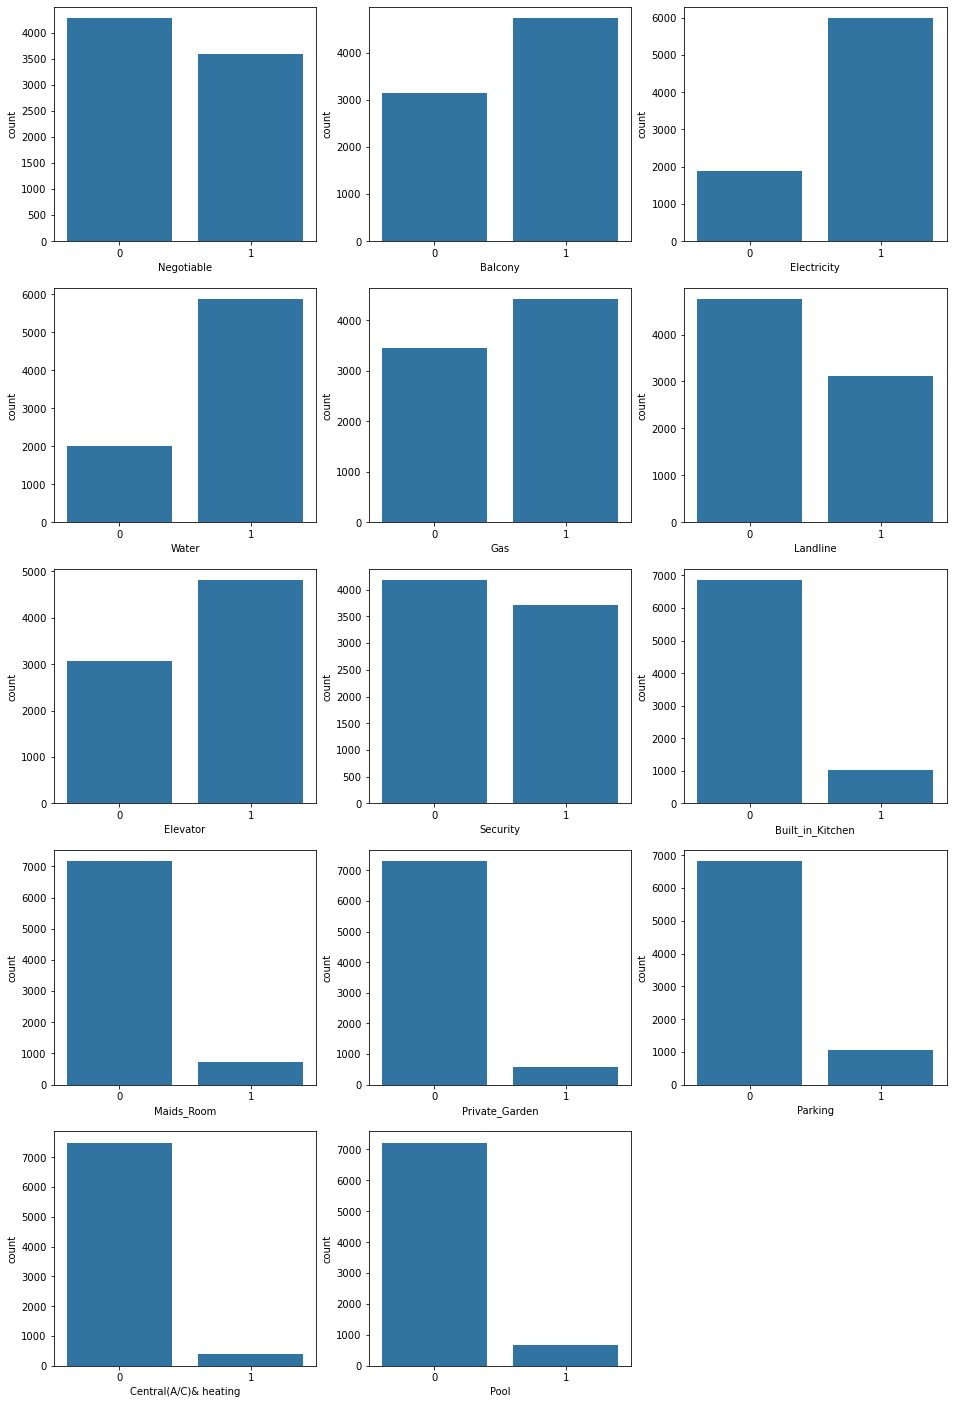

In [32]:
plt.figure(figsize = [16,25]);
color = sb.color_palette()[0]
i = 1
for n in variables:
    plt.subplot(5,3,i)
    sb.countplot(data = df, x =df[n], color = color)
    i+=1

In [33]:
df.isna().sum()

Area(SQM)                   0
Bedroom                     0
Bathroom                    0
Location                    0
Price                       0
Negotiable                  0
Balcony                     0
Electricity                 0
Water                       0
Gas                         0
Landline                    0
Elevator                    0
Security                    0
Built_in_Kitchen            0
Maids_Room                  0
Private_Garden              0
Parking                     0
Central(A/C)& heating       0
Pool                        0
Type                        1
Level                     392
Furnished                1329
Compound                 7360
Delivery_Date            2666
Delivery_Term            1486
dtype: int64

* ['Type', 'Level','Furnished', 'Compound', 'Delivery_Date', 'Delivery_Term'] have nulls
* we have to deal with null values first :

### Type:

In [34]:
df[df['Type'].isna()]

,Area(SQM),Bedroom,Bathroom,Location,Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Type,Level,Furnished,Compound,Delivery_Date,Delivery_Term
1481,130,2,1,Asafra,950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df = df.drop(1481)

In [36]:
df['Type'].isna().sum()

0

### Level :

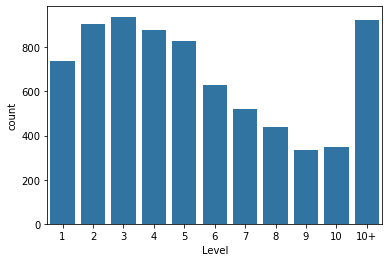

In [37]:
sb.countplot(data = df, x = 'Level',color = color, order = ['1','2','3','4','5','6','7','8','9','10','10+']);

* For missing value in 'Level' Column, we want to randomly fill nulls with values that will not affect the distribution of the existence values
* We will use Forward fill method to fill nulls as folloing :

In [38]:
df['Level'] = df['Level'].fillna(method='ffill')

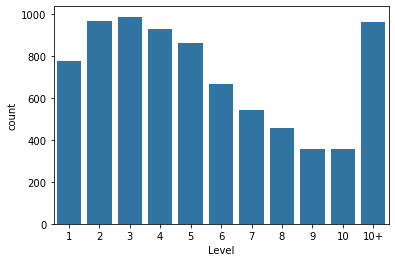

In [39]:
sb.countplot(data = df, x = 'Level',color = color, order = ['1','2','3','4','5','6','7','8','9','10','10+']);

* as we see, the distribution of values not affected.

### Furnished :

In [40]:
df['Furnished'].unique()

array([ 0., nan,  1.])

In [41]:
df['Furnished'].value_counts()

0.0    5766
1.0     783
Name: Furnished, dtype: int64

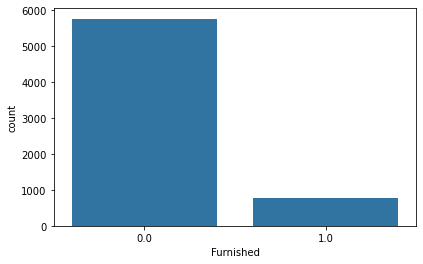

In [42]:
plt.figure(figsize = [6.5,4]);
sb.countplot(data = df, x = df['Furnished'], color = color);

* It is customary that apartment are sold without furniture, and in the event that the seller wants to sell it with furniture, he will mention it in the advertisement to draw attention to the buyer that this will be at a higher value for sure, and therefore we will assume that the missing values are for apartments that will be sold without furniture.  

In [43]:
df['Furnished'] = df['Furnished'].fillna(0)

In [44]:
df['Furnished'].isna().sum()

0

### Compound :

In [45]:
df['Compound'].unique()

array([nan, 'Murooj', 'Nakheel', 'Amorada', 'ABHA', 'Skyline', 'Asala',
       'VGK', 'Madinaty', 'Dyar', 'Andalus', 'Yaru', 'Ashrafeya', 'OIA',
       'Akoya', 'Kenz', 'Atika', 'Gardenia', 'Pukka', 'Eshraqa', 'Aswar',
       'Etlalah', 'Azzar', 'Bellagio', 'Alma', 'Sama'], dtype=object)

* As we see from in column value, it mentioned the Compound name if it exists, so we will assume that the null value means that the apartment is not located inside any  Compound.

In [46]:
df['Compound'] = df['Compound'].fillna('Not_In_Compound')

In [47]:
df['Compound'].isna().sum()

0

### Delivery_Date :

* for null values, The seller "to a large extent" will have to mention the date of delivery of the apartment if there is something that will postpone the delivery process, but in the event that the apartment is ready for delivery, this is the norm.
* So we will assume that null values indicate that the apartment is ready for deliver.

In [48]:
df['Delivery_Date'].unique()

array(['Ready', nan, 'soon', '2023', '2025', '2024', 'within 6 months',
       '2022', '2026', '2029', '2027'], dtype=object)

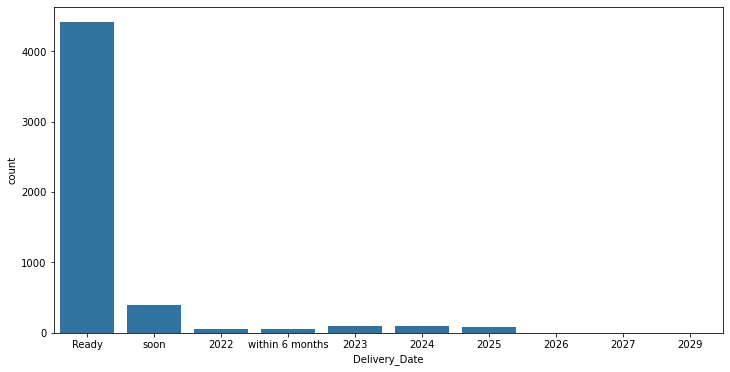

In [49]:
plt.figure(figsize = [12,6]);
sb.countplot(data = df, x = 'Delivery_Date',color = color, order = ['Ready','soon','2022','within 6 months','2023',
                                                                    '2024','2025','2026','2027','2029']);

In [50]:
df['Delivery_Date'] = df['Delivery_Date'].fillna('Ready')

In [51]:
df['Delivery_Date'].isna().sum()

0

### Delivery_Term :

In [52]:
df['Delivery_Term'].unique()

array(['Finished', nan, 'Not Finished', 'Semi Finished', 'Core & Shell'],
      dtype=object)

In [53]:
df['Delivery_Term'].value_counts()

Finished         5896
Semi Finished     280
Not Finished      174
Core & Shell       42
Name: Delivery_Term, dtype: int64

* If the apartment is not finished 'to a large extent' the seller will excuse this, so we will assume that the missing values belong to the finished apartments.

In [54]:
df['Delivery_Term'] = df['Delivery_Term'].fillna('Finished')

In [55]:
df.isnull().sum()

Area(SQM)                0
Bedroom                  0
Bathroom                 0
Location                 0
Price                    0
Negotiable               0
Balcony                  0
Electricity              0
Water                    0
Gas                      0
Landline                 0
Elevator                 0
Security                 0
Built_in_Kitchen         0
Maids_Room               0
Private_Garden           0
Parking                  0
Central(A/C)& heating    0
Pool                     0
Type                     0
Level                    0
Furnished                0
Compound                 0
Delivery_Date            0
Delivery_Term            0
dtype: int64

In [56]:
# Creat a variable of price per metter square :
df['meter_price'] = df['Price'] / df['Area(SQM)']

In [57]:
df.head()

,Area(SQM),Bedroom,Bathroom,Location,Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Type,Level,Furnished,Compound,Delivery_Date,Delivery_Term,meter_price
0,125,3,2,Shatby,2200000,1,1,1,1,1,0,1,0,0,0,0,0,0,0,Apartment,10,0.0,Not_In_Compound,Ready,Finished,17600.000000
1,120,4,1,Sidi Beshr,500000,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Apartment,3,0.0,Not_In_Compound,Ready,Finished,4166.666667
2,165,3,2,Sidi Beshr,1500000,1,1,1,1,1,0,1,0,0,0,0,0,0,0,Apartment,3,0.0,Not_In_Compound,Ready,Finished,9090.909091
3,155,3,2,Cleopatra,1650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Apartment,3,0.0,Not_In_Compound,Ready,Finished,10645.161290
4,210,3,2,Smoha,2950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Apartment,6,0.0,Not_In_Compound,Ready,Finished,14047.619048


## Bivariate Visualization :

#### we will explore the relation between each variable and price :

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7877 entries, 0 to 8740
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area(SQM)              7877 non-null   int64  
 1   Bedroom                7877 non-null   int32  
 2   Bathroom               7877 non-null   int32  
 3   Location               7877 non-null   object 
 4   Price                  7877 non-null   int64  
 5   Negotiable             7877 non-null   int64  
 6   Balcony                7877 non-null   int64  
 7   Electricity            7877 non-null   int64  
 8   Water                  7877 non-null   int64  
 9   Gas                    7877 non-null   int64  
 10  Landline               7877 non-null   int64  
 11  Elevator               7877 non-null   int64  
 12  Security               7877 non-null   int64  
 13  Built_in_Kitchen       7877 non-null   int64  
 14  Maids_Room             7877 non-null   int64  
 15  Priv

In [59]:
df.head(3)

,Area(SQM),Bedroom,Bathroom,Location,Price,Negotiable,Balcony,Electricity,Water,Gas,Landline,Elevator,Security,Built_in_Kitchen,Maids_Room,Private_Garden,Parking,Central(A/C)& heating,Pool,Type,Level,Furnished,Compound,Delivery_Date,Delivery_Term,meter_price
0,125,3,2,Shatby,2200000,1,1,1,1,1,0,1,0,0,0,0,0,0,0,Apartment,10,0.0,Not_In_Compound,Ready,Finished,17600.000000
1,120,4,1,Sidi Beshr,500000,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Apartment,3,0.0,Not_In_Compound,Ready,Finished,4166.666667
2,165,3,2,Sidi Beshr,1500000,1,1,1,1,1,0,1,0,0,0,0,0,0,0,Apartment,3,0.0,Not_In_Compound,Ready,Finished,9090.909091


In [60]:
# Numeric Variables :
df._get_numeric_data().columns

Index(['Area(SQM)', 'Bedroom', 'Bathroom', 'Price', 'Negotiable', 'Balcony',
       'Electricity', 'Water', 'Gas', 'Landline', 'Elevator', 'Security',
       'Built_in_Kitchen', 'Maids_Room', 'Private_Garden', 'Parking',
       'Central(A/C)& heating', 'Pool', 'Furnished', 'meter_price'],
      dtype='object')

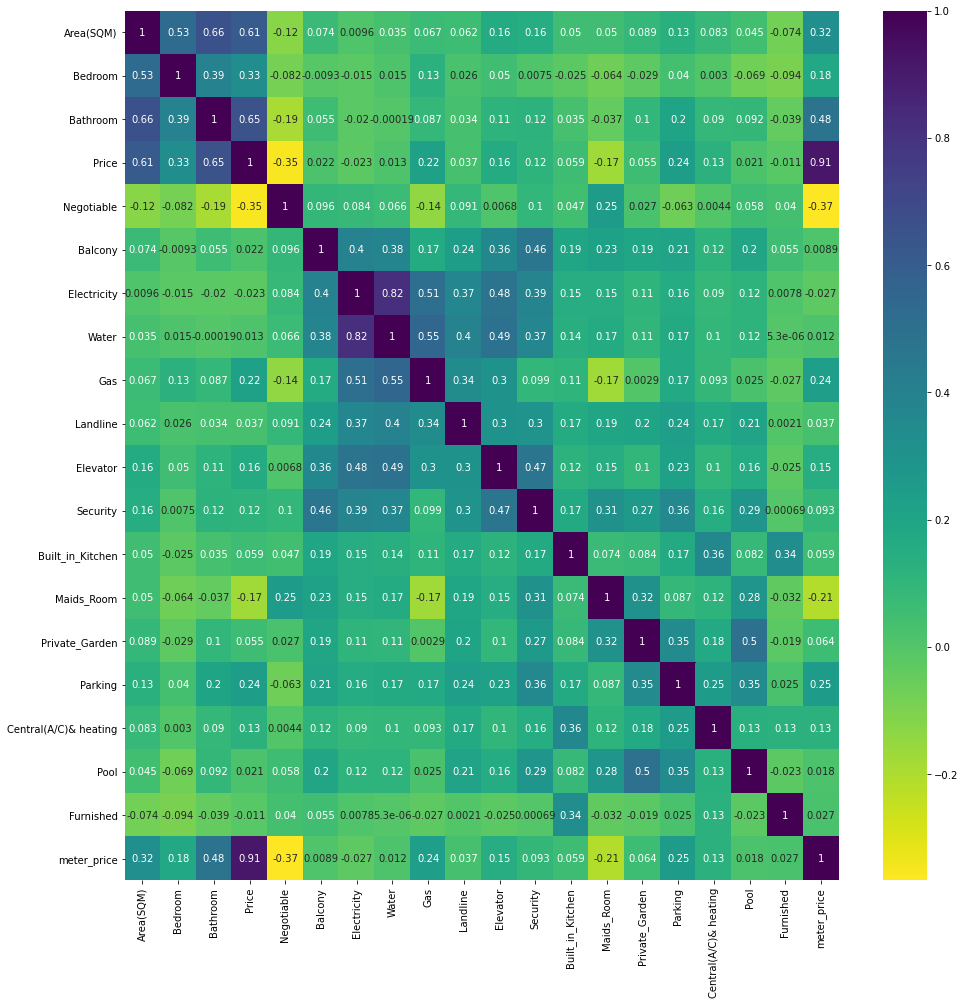

In [61]:
plt.figure(figsize = [16,16]);
sb.heatmap(df.corr(), annot = True, cmap = 'viridis_r');

In [62]:
# correlation coeff between each feature and price :
conf_matrx = df.corr()
conf_matrx.Price

Area(SQM)                0.613755
Bedroom                  0.334985
Bathroom                 0.654187
Price                    1.000000
Negotiable              -0.351260
Balcony                  0.022198
Electricity             -0.023274
Water                    0.013455
Gas                      0.221349
Landline                 0.036781
Elevator                 0.163591
Security                 0.117092
Built_in_Kitchen         0.058939
Maids_Room              -0.174543
Private_Garden           0.054811
Parking                  0.244926
Central(A/C)& heating    0.125895
Pool                     0.020815
Furnished               -0.011344
meter_price              0.914606
Name: Price, dtype: float64

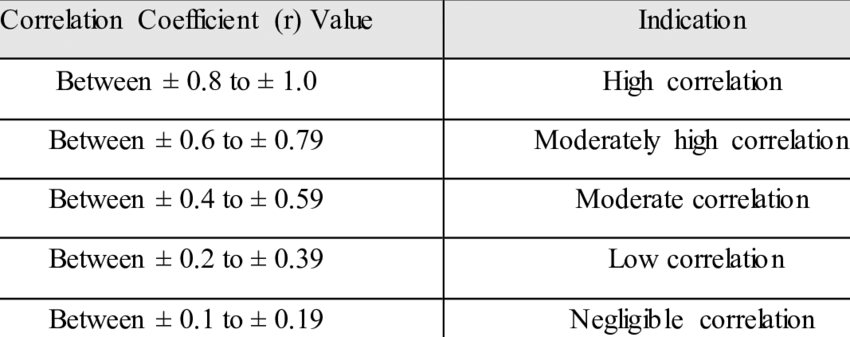

* From correlation coeff we can see that features like [Area, Bedroom, Bathroom, Gas, Parking] have a good Coef value.

In [138]:
# Categorical Variables :
df.select_dtypes(include=['object']).columns.tolist()

['Location', 'Type', 'Level', 'Compound', 'Delivery_Date', 'Delivery_Term']

### Location vs. Price :

In [177]:
# create a new list contain 'Location' column's values :
loc_ = list(df.Location.unique())

# create a new list for mean meter price according to each location :
mean_meter_price = []

# create a loop to calculate the mean meter price for location :
for i in loc_ :
    x = df[df['Location'] == i].meter_price.mean()
    mean_meter_price.append(x)

In [178]:
# create a new series of [loc_, mean_meter_price]
df2 = pd.Series(mean_meter_price , loc_)

# convert series to Dataframe :
df2 = pd.DataFrame(df2, columns = ['mean_meter_price'])
df2 = df2.reset_index().rename(columns = {'index' : 'location'})

In [181]:
# sorting columns ascending according to (mean_meter_price):
df2 = df2.sort_values('mean_meter_price')
df2 = df2.reset_index().drop(['index'], axis = 1)

In [182]:
df2

,location,mean_meter_price
0,Nakheel,2722.510849
1,Agami,3520.564069
2,Abu Talat,3844.459648
3,Dekheila,4052.671998
4,Dhahria,4314.463560
5,Awayed,4378.736545
6,Bacchus,4504.665935
7,Kabbary,4569.355742
8,Abu Qir,4684.896919
9,El Max,4727.312600


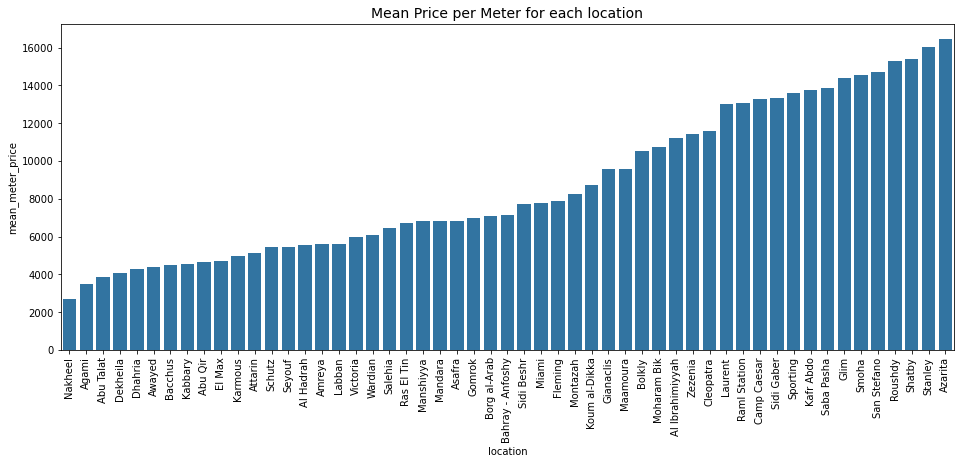

In [187]:
plt.figure(figsize = [16,6]);
sb.barplot(data = df2, x = 'location', y = 'mean_meter_price',color = color);
plt.xticks(rotation = 90);
plt.title("Mean Price per Meter for each location", size = 14);

### Price vs. Level :

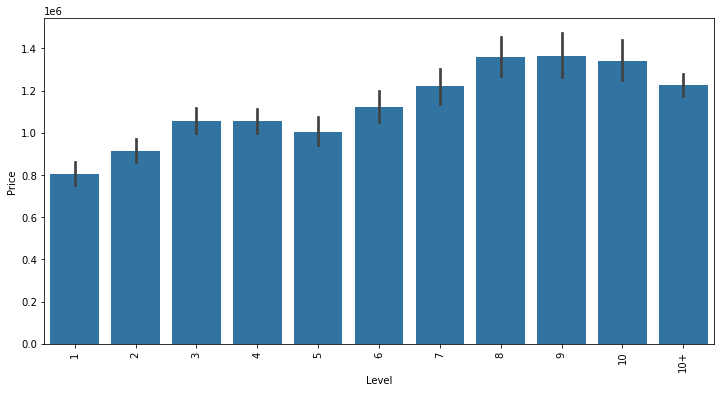

In [195]:
plt.figure(figsize = [12,6]);
sb.barplot(data = df, x = 'Level', y = 'Price',color = color, order = ['1','2','3','4','5','6','7','8','9','10','10+']);
plt.xticks(rotation = 90);

### Price vs. Compound :

In [199]:
# create a new list contain compound name :
loc_ = list(df.Compound.unique())

# create a new list for mean meter price according to each location :
mean_meter_price = []

# create a loop to calculate the mean meter price for location :
for i in loc_ :
    x = df[df['Compound'] == i].meter_price.mean()
    mean_meter_price.append(x)

In [201]:
# create a new series of [loc_, mean_meter_price]
df3 = pd.Series(mean_meter_price , loc_)

# convert series to Dataframe :
df3 = pd.DataFrame(df3, columns = ['mean_meter_price'])
df3 = df3.reset_index().rename(columns = {'index' : 'compound'})

In [202]:
# sorting columns ascending according to (mean_meter_price):
df3 = df3.sort_values('mean_meter_price')
df3 = df3.reset_index().drop(['index'], axis = 1)
df3

,compound,mean_meter_price
0,Dyar,2285.714286
1,Atika,2631.578947
2,Alma,2666.666667
3,Nakheel,2783.811983
4,Eshraqa,2875.000000
5,Madinaty,3052.631579
6,Pukka,3125.000000
7,Kenz,3181.818182
8,Ashrafeya,3428.571429
9,Akoya,3766.666667


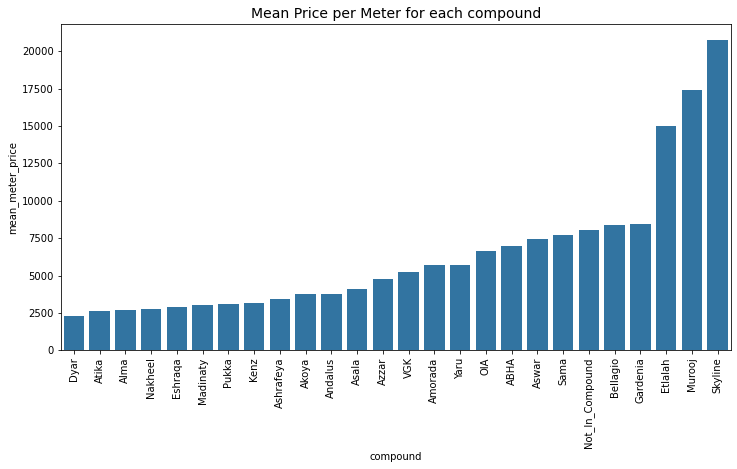

In [204]:
plt.figure(figsize = [12,6]);
sb.barplot(data = df3, x = 'compound', y = 'mean_meter_price',color = color);
plt.xticks(rotation = 90);
plt.title("Mean Price per Meter for each compound", size = 14);

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [66]:
model = LinearRegression()

In [68]:
x = df.drop('Price', axis = 'columns')
y = df['Price']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [70]:
model.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(x_test)

In [73]:
mean_squared_error(y_test,y_pred)

191766163034.44357